In [103]:
%matplotlib inline
import pickle
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from functools import reduce
import concurrent.futures

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

import sklearn.base

import itertools
import time

def print_full(x):
    pd.set_option('display.max_rows', 10000)
    pd.set_option('display.max_columns', 10000)

    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    
from sklearn.utils import shuffle

In [28]:
df = pd.read_csv("features_global.csv", low_memory=False, header = None, na_values = ['null'])
df

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
0,blue,2984814498,0.650000,423.95993,1.917431,0.917431,2.900000,133402.100,17926.000,16480.800,...,13711.350,114.100000,1.190000,1.685000,-0.402500,-3.525000e-01,193.48500,332.70502,-10.030000,-7.407500
1,purple,3034035764,0.526316,402.25280,2.000000,1.000000,2.157895,137797.310,17697.053,17959.790,...,17441.264,302.210540,1.189474,1.642105,0.100000,-8.157895e-02,200.77895,350.03687,4.418421,30.384210
2,purple,3036731710,0.409091,421.79210,2.215569,1.215569,3.636364,154794.270,23505.592,24949.682,...,29733.684,782.631600,0.326316,0.773684,-0.036842,-4.131579e-01,223.42105,339.43683,-9.331579,-31.594736
3,purple,3018436026,0.473684,384.25073,1.917526,0.917526,2.368421,136257.270,17298.736,18882.053,...,14255.750,136.250000,0.235000,0.405000,-0.330000,-2.250001e-02,165.56500,310.27000,0.042500,65.232500
4,blue,3026930091,0.478261,398.31564,2.887755,1.887755,4.173913,125274.305,17986.130,22280.957,...,16022.895,226.684200,7.163158,6.894737,0.857895,3.236842e-01,288.94210,461.35263,24.378946,56.265793
5,blue,3028334136,0.526316,343.12140,1.863158,0.863158,1.789474,89013.370,16414.630,24993.264,...,23999.250,299.450000,2.760000,2.810000,0.235000,-8.499999e-02,213.98999,320.76498,6.447500,-11.749999
6,purple,3028547600,0.500000,366.60815,2.262500,1.262500,3.250000,113581.300,16445.050,17268.050,...,20433.500,406.400000,1.310000,2.165000,-0.307500,2.225000e-01,192.24500,320.53000,-2.527500,30.817501
7,purple,3031484196,0.684211,386.89910,2.750000,1.750000,3.631579,142492.730,16277.211,29671.895,...,23988.264,285.000000,3.068421,3.947368,-0.028947,1.294048e-08,218.45264,366.11580,2.278948,14.107896
8,blue,3031485081,0.500000,386.21777,1.984252,0.984252,3.200000,139216.000,16002.350,29248.350,...,18502.790,133.947370,3.736842,4.747368,0.171053,-2.631564e-03,218.87895,389.62630,8.397368,11.939474
9,purple,3035608316,0.421053,403.22015,2.100719,1.100720,3.157895,175229.730,25884.895,23907.316,...,27127.684,549.894700,3.394737,5.373684,-0.678947,-1.131579e-01,221.16316,374.58423,-17.931580,26.313158


In [32]:
df = df.dropna(how = 'any', thresh = 172)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
0,blue,2984814498,0.650000,423.95993,1.917431,0.917431,2.900000,133402.100,17926.000,16480.800,...,13711.350,114.10000,1.190000,1.685000,-0.402500,-0.352500,193.48500,332.70502,-10.030000,-7.407500
1,purple,3034035764,0.526316,402.25280,2.000000,1.000000,2.157895,137797.310,17697.053,17959.790,...,17441.264,302.21054,1.189474,1.642105,0.100000,-0.081579,200.77895,350.03687,4.418421,30.384210
2,purple,3036731710,0.409091,421.79210,2.215569,1.215569,3.636364,154794.270,23505.592,24949.682,...,29733.684,782.63160,0.326316,0.773684,-0.036842,-0.413158,223.42105,339.43683,-9.331579,-31.594736
3,purple,3018436026,0.473684,384.25073,1.917526,0.917526,2.368421,136257.270,17298.736,18882.053,...,14255.750,136.25000,0.235000,0.405000,-0.330000,-0.022500,165.56500,310.27000,0.042500,65.232500
4,blue,3026930091,0.478261,398.31564,2.887755,1.887755,4.173913,125274.305,17986.130,22280.957,...,16022.895,226.68420,7.163158,6.894737,0.857895,0.323684,288.94210,461.35263,24.378946,56.265793


In [36]:
df.isnull().sum().sum()

0

In [62]:
y_key = 0
X = df.drop([0, 1], axis = 1)
y = df[0] == 'purple'
X.head()
y.head()

0    False
1     True
2     True
3     True
4    False
Name: 0, dtype: bool

In [64]:
y.value_counts()

False    7002
True     6658
Name: 0, dtype: int64

In [65]:
X_w, X_test, y_w, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1000)

In [88]:
def scorer(estimator, X_train, X_test, y_train, y_test, destandardise): 
    pred = estimator.predict(X_test)
    if destandardise:
        pred = destandardise(pred)
        y_test = destandardise(y_test)
    test_acc = accuracy_score(y_test, pred)
        
    pred_train = estimator.predict(X_train)
    if destandardise:
        pred_train = destandardise(pred_train)
        y_train = destandardise(y_train)
    train_acc = accuracy_score(y_train, pred_train)
    
    return (test_acc, train_acc)

def CVstep(classifier, transf, X, y, train_index, test_index, scorer):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    X_train, X_test, y_train, y_test, destandardise = transf(X_train, X_test, y_train, y_test)
    
    estimator = sklearn.base.clone(classifier)
    estimator.fit(X_train, y_train.ix[:, 0].values)
    return scorer(estimator, X_train, X_test, y_train, y_test, destandardise)

# Takes an iterable of classifiers and returns their cross-validation results for each split.
# It uses the same splits for each model so they can be directly compared.
def CV(modelsParams, X, y, scorer, n_splits):
    def runCVmodels(train_index, test_index):
        return [CVstep(model, transf, X, y, train_index, test_index, scorer) for (model, transf) in modelsParams]
    
    kf = model_selection.KFold(n_splits=n_splits, shuffle = True)
    #return [runCVmodels(train_index, test_index) for (train_index, test_index) in kf.split(X)]
    with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
        print("starting new step")
        t = time.time()

        future_CV_results = {executor.submit(runCVmodels, train_index, test_index): (train_index, test_index) for (train_index, test_index) in kf.split(X)}
        ret = [future.result() for future in concurrent.futures.as_completed(future_CV_results)]
        print('step took: ' + str(time.time() - t) + 's')
        return ret
#        return [[CVstep(model, transf, X, y, train_index, test_index, scorer) for (model, transf) in modelsParams]
#                for train_index, test_index in kf.split(X)]



def standardise(X_w, X_test, y_w, y_test, omitY = False):
    mu_x = X_w.mean()
    sigma2_x = X_w.std()
    
    # only standardize non binary variables
    nonBinaryCols = X_w.columns[X_w.apply(lambda x: len(x.unique()), axis=0) > 2]
    binaryCols = X_w.columns[X_w.apply(lambda x: len(x.unique()), axis=0) <= 2]
    
    X_w_std = (X_w[nonBinaryCols] - mu_x[nonBinaryCols])/(sigma2_x)
    X_test_std = (X_test[nonBinaryCols] - mu_x[nonBinaryCols])/(sigma2_x)
    X_w_std.fillna(X_w[binaryCols], inplace = True)
    X_test_std.fillna(X_test[binaryCols], inplace = True)
       
        
    if (omitY):
        y_w_std = y_w
        y_test_std = y_test
        return (X_w_std, X_test_std, y_w_std, y_test_std, None)
    else:
        mu_y = y_w.mean()
        sigma2_y = y_w.std()
        y_w_std = (y_w - mu_y)/(sigma2_y)
        y_test_std = (y_test - mu_y)/(sigma2_y)
        def destandardise(y):
            return y*sigma2_y.ix[0] + mu_y.ix[0]
        
        return (X_w_std, X_test_std, y_w_std, y_test_std, destandardise)
        
    
    


# Tuning

In [67]:
X_w_sel = X_w.reset_index(drop = True)
y_w_sel = y_w.reset_index(drop = True)

X_test_sel = X_test.reset_index(drop = True)
y_test_sel = y_test.reset_index(drop = True)

In [71]:
def transf (normaliseY = False):
    def ret_f(X_train, X_val, y_train, y_val):
        X_train, X_val = X_train.copy(), X_val.copy()

        # standardise
        rets = standardise(X_train, X_val, y_train, y_val, omitY = ~normaliseY)
        # replace nan by 0
        def f(x):
            return x.fillna(0)
        rets = list(map(f, rets[0:-1])) + [rets[-1]]
        return rets
        
    return ret_f

f_transf =  transf()

In [75]:
otherParams = {
      'max_iter': 3000,
     'alpha': 0.005,
    'tol': 5e-7,
    'solver': 'lbfgs'
}


lrs = [(linear_model.LinearRegression(), transf())]

f_transf =  transf()

# MLP1 = [
#     (MLPRegressor(hidden_layer_sizes=(1), **otherParams), transf),
#     (MLPRegressor(hidden_layer_sizes=(50), **otherParams), transf),
#     (MLPRegressor(hidden_layer_sizes=(80), **otherParams), transf),
#     (MLPRegressor(hidden_layer_sizes=(100), **otherParams), transf), # 0.00635038  
#     (MLPRegressor(hidden_layer_sizes=(140), **otherParams), transf)
# ]


# MLP2 = [
#     (MLPRegressor(hidden_layer_sizes=(100, 10), **otherParams), transf),
#     (MLPRegressor(hidden_layer_sizes=(100, 30), **otherParams), transf),
#     (MLPRegressor(hidden_layer_sizes=(100, 50), **otherParams), transf) # 8162.34751391
# ]

# MLP3 = [
#     (MLPRegressor(hidden_layer_sizes=(200, 50, 30), **otherParams), f_transf),
#     (MLPRegressor(hidden_layer_sizes=(200, 100, 30), **otherParams), f_transf)
# #     (MLPRegressor(hidden_layer_sizes=(100, 50, 15), **otherParams), transf),
# #     (MLPRegressor(hidden_layer_sizes=(100, 50, 30), **otherParams), transf),
# #     (MLPRegressor(hidden_layer_sizes=(100, 70, 55), **otherParams), transf)
# ]




otherParams = {
    'max_iter': 100,
    'alpha': 0.005,
    'tol': 5e-7,
    'solver': 'adam'
}

MLPcomp = [
    (MLPClassifier(hidden_layer_sizes=(10), **otherParams),f_transf),
    (MLPClassifier(hidden_layer_sizes=(20), **otherParams), f_transf)

#     (MLPRegressor(hidden_layer_sizes=(100, 30), **otherParams), f_transf),
#     (MLPRegressor(hidden_layer_sizes=(100, 50), **otherParams), f_transf) # 8162.34751391
]


# Cross-validation (average over 5 different 5-fold splits to smooth the result)
t = time.time()
scores = np.concatenate(np.asarray([CV(lrs + MLPcomp, X_w_sel, y_w_sel, scorer, 1) for i in range(0, 1)]))

print(time.time() - t)


test_rmse, train_rmse = scores.mean(axis=0).T
print(test_rmse, train_rmse)


ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

In [27]:
scores

array([[[ 48432.13365517,  42014.38194271],
        [ 42025.87788983,   4587.89908567],
        [ 44948.6206483 ,   6457.6567903 ],
        [ 40942.41421438,   4247.80867046]],

       [[ 41295.07076214,  42706.76675315],
        [ 13952.14507833,   6304.62332598],
        [ 13821.97083455,   6176.71423557],
        [ 13234.23954088,   5009.7552289 ]],

       [[ 48045.77520405,  41930.94390393],
        [ 30799.58139093,   4592.37637184],
        [ 29764.77427212,   7674.15085038],
        [ 27439.35263864,   4451.5063667 ]],

       [[ 43013.04109844,  42531.18848792],
        [ 13638.77954926,   4420.21638022],
        [ 14408.52563703,   4804.97936744],
        [ 13796.19887198,   4102.50610558]],

       [[ 39560.62553463,  42932.72824261],
        [ 15248.76551938,   4894.088201  ],
        [ 13586.9711938 ,   4040.28993419],
        [ 16166.34312822,   4220.76661437]],

       [[ 39558.61810603,  42921.71917423],
        [ 17925.14617553,   4856.12874638],
        [ 17297.656306

In [28]:
NormMLP = [
    (MLPRegressor(hidden_layer_sizes=(200, 60, 30), **otherParams), transf(dummies = True, normaliseY = False, logs = False)),
    (MLPRegressor(hidden_layer_sizes=(200, 60, 30), **otherParams), transf(dummies = True, normaliseY = True, logs = False))
]




# Cross-validation (average over 5 different 5-fold splits to smooth the result)
t = time.time()
scores = np.concatenate(np.asarray([CV(lrs + NormMLP, X_w_sel, y_w_sel, scorer, 10) for i in range(0, 2)]))

print(time.time() - t)


test_rmse, train_rmse = scores.mean(axis=0).T
print(test_rmse, train_rmse)


starting new step
step took: 698.029862165451s
starting new step
step took: 706.0914270877838s
1404.1249868869781
[ 43579.8603137   16012.92835694  15654.33319613] [ 42466.76846337   5029.12000641   5132.76052644]


In [ ]:
logsMLP = [
    (MLPRegressor(hidden_layer_sizes=(200, 60, 30), **otherParams), transf(dummies = True, normaliseY = False, logs = False)),
    (MLPRegressor(hidden_layer_sizes=(200, 60, 30), **otherParams), transf(dummies = True, normaliseY = False, logs = True))
]




# Cross-validation (average over 2 different 10-fold splits to smooth the result)
t = time.time()
scores = np.concatenate(np.asarray([CV(lrs + logsMLP, X_w_sel, y_w_sel, scorer, 10) for i in range(0, 2)]))

print(time.time() - t)


test_rmse, train_rmse = scores.mean(axis=0).T
print(test_rmse, train_rmse)


In [13]:
DummiesMLP = [
    (MLPRegressor(hidden_layer_sizes=(200, 60, 30), **otherParams), transf(dummies = True, normaliseY = False, logs = False)),
    (MLPRegressor(hidden_layer_sizes=(200, 60, 30), **otherParams), transf(dummies = False, normaliseY = False, logs = False))
]




# Cross-validation (average over 5 different 5-fold splits to smooth the result)
t = time.time()
scores = np.concatenate(np.asarray([CV(lrs + DummiesMLP, X_w_sel, y_w_sel, scorer, 10) for i in range(0, 2)]))

print(time.time() - t)


test_rmse, train_rmse = scores.mean(axis=0).T
print(test_rmse, train_rmse)

starting new step
step took: 271.72935700416565s
starting new step
step took: 264.1624870300293s
535.8962640762329
[ 43505.27407225  15672.54168183  15960.03293523] [ 42477.92650702   5260.84213263   5349.97242937]


In [ ]:
otherParams = {
      'max_iter': 1000,
#     'random_state': 1,
    #'alpha': 1e-5,
    'tol': 5e-08,
    'solver': 'lbfgs',
#     'batch_size': 200,
#     'learning_rate_init': 0.005,
#     'momentum': 0.9
}

lr = linear_model.LinearRegression()
# MLP = MLPRegressor(hidden_layer_sizes=(50, 20), **otherParams)
# MLP2 = MLPRegressor(hidden_layer_sizes=(20), **otherParams)

alphas = sum( [[1 * pow(10, i), 0.5*pow(10, i)] for i in range(1, -10, -1)], [])
MLP_alphas = [(MLPRegressor(hidden_layer_sizes=(200, 60, 30), alpha = alpha , **otherParams), transf)  for alpha in alphas]

# Cross-validation (average over 5 different 5-fold splits to smooth the result)
t = time.time()
alpha_scores = np.concatenate(np.asarray([CV([(lr, transflr)] + MLP_alphas, X_w_sel, y_w_sel, scorer, 10) for i in range(0, 2)]))
#scores = np.concatenate(np.asarray([CV([(lr, transflr), (lr, transf)], X_w_sel, y_w_sel, scorer, 10) for i in range(0, 5)]))

print(time.time() - t)


test_rmse, train_rmse = alpha_scores.mean(axis=0).T
print(test_rmse, train_rmse)

In [ ]:
test_rmse, train_rmse = alpha_scores[:, 1:].mean(axis=0).T
# Build Graph
fig, ax = plt.subplots()

ax.set_xscale('log')
plt.xlim(10, 0)

iterRange = alphas
ax.plot(iterRange, test_rmse, label='Test')
ax.plot(iterRange, train_rmse, label='Train')


# Now add the legend with some customizations.
legend = ax.legend(loc='center right', shadow=True)

plt.xlabel('Alpha')
plt.ylabel('RMSE')

alphas[np.argmin(test_rmse)] # best alpha = 0.05

In [32]:
otherParams = {
      'max_iter': 2000,
     'alpha': 0.005,
#     'tol': 1e-5,
    'solver': 'lbfgs'
}

lr = linear_model.LinearRegression()

tols = sum( [[1 * pow(10, i), 0.5*pow(10, i)] for i in range(-4, -10, -1)], [])
MLP_tol = [(MLPRegressor(hidden_layer_sizes=(200, 60, 30), tol = tol , **otherParams), f_transf)  for tol in tols]

# Cross-validation (average over 5 different 5-fold splits to smooth the result)
t = time.time()
tols_scores = np.concatenate(np.asarray([CV(lrs + MLP_tol, X_w_sel, y_w_sel, scorer, 10) for i in range(0, 2)]))

print(time.time() - t)


test_rmse, train_rmse = tols_scores.mean(axis=0).T
print(test_rmse, train_rmse)



starting new step


KeyboardInterrupt: 

5e-07

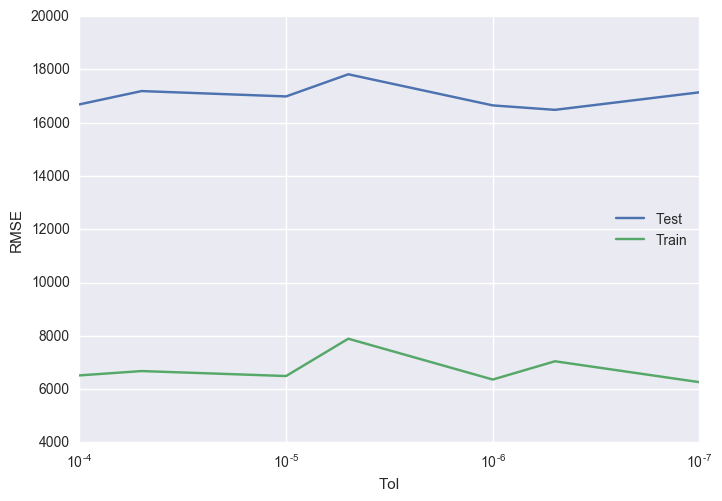

In [31]:
test_rmse, train_rmse = tols_scores[:, 1:].mean(axis=0).T
# Build Graph
fig, ax = plt.subplots()

ax.set_xscale('log')
plt.xlim(max(tols), 0)


iterRange = tols
ax.plot(iterRange, test_rmse, label='Test')
ax.plot(iterRange, train_rmse, label='Train')


# Now add the legend with some customizations.
legend = ax.legend(loc='center right', shadow=True)

plt.xlabel('Tol')
plt.ylabel('RMSE')

tols[np.argmin(test_rmse)] # best tol = 5e-8

In [11]:
otherParams = {
#     'max_iter': 1000,
     'alpha': 0.05,
     'tol': 5e-8,
    'solver': 'lbfgs'
}

lr = linear_model.LinearRegression()

iters = [i for i in range(100, 2001, 200)]
MLP_iters = [(MLPRegressor(hidden_layer_sizes=(100, 30, 10), max_iter = iter , **otherParams), transf)  for iter in iters]

# Cross-validation (average over 5 different 5-fold splits to smooth the result)
t = time.time()
iters_scores = np.concatenate(np.asarray([CV([(lr, transflr)] + MLP_iters, X_w_sel, y_w_sel, scorer, 10) for i in range(0, 2)]))

print(time.time() - t)


test_rmse, train_rmse = iters_scores.mean(axis=0).T
print(test_rmse, train_rmse)

starting new step
step took: 1255.4540431499481s
starting new step
step took: 1250.1448929309845s
2505.6014235019684
[ 0.01471166  0.0166541   0.01304239  0.01052078  0.00801574  0.0074269
  0.00677452  0.00650567  0.00657801  0.00922099  0.00656887] [ 0.01247252  0.01348377  0.01046241  0.00718022  0.00437064  0.0033862
  0.00287562  0.0026672   0.00254805  0.00547458  0.00252093]


1300

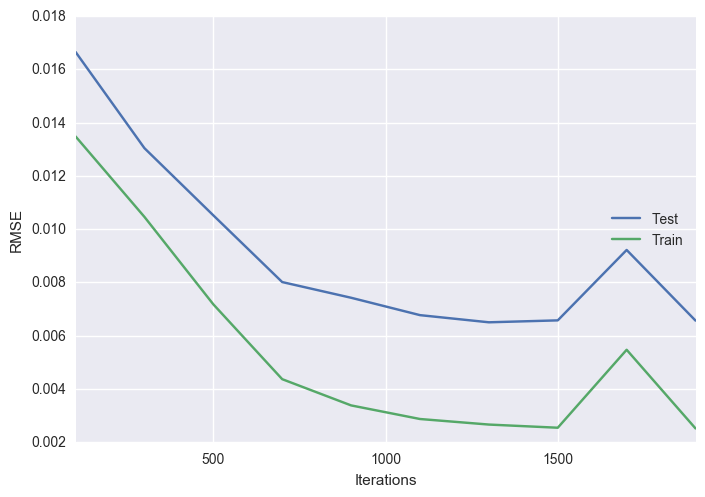

In [20]:
test_rmse, train_rmse = iters_scores[:, 1:].mean(axis=0).T
# Build Graph
fig, ax = plt.subplots()

# ax.set_xscale('log')
plt.xlim(min(iters), max(iters))


iterRange = iters
ax.plot(iterRange, test_rmse, label='Test')
ax.plot(iterRange, train_rmse, label='Train')


# Now add the legend with some customizations.
legend = ax.legend(loc='center right', shadow=True)

plt.xlabel('Iterations')
plt.ylabel('RMSE')

iters[np.argmin(test_rmse)] # best max_iters = 1200-1300

In [84]:
def tmp(estimator, transf, scorer, X_train, X_test, y_train, y_test):
    X_train, X_test, y_train, y_test, destandardise = transf(X_train, X_test, y_train, y_test)
    estimator = sklearn.base.clone(estimator)
    estimator.fit(X_train, y_train)
#     pred = estimator.predict(X_test)
#     e = [math.pow(y_true[0] - y_pred[0], 2) for y_true, y_pred in zip(pred, np.asarray(y_test))]
#     print(math.sqrt(statistics.mean(e)))
    
#     comparison = [(y_true[0], y_pred[0]) for y_true, y_pred in zip(pred, np.asarray(y_test))]
    return scorer(estimator, X_train, X_test, y_train, y_test, destandardise)



In [46]:
scores = np.concatenate(np.asarray([CV([(lr, transflr), (MLP, transflr),  (MLP2, transflr), (MLP3, transflr)], X, y[['rgdpna']], scorer, 10) for i in range(0, 1)]))

test_rmse, train_rmse = scores.mean(axis=0).T
print(test_rmse, train_rmse)

starting new step
[ 0.063942    0.09465201  0.08798153  0.07787949] [ 0.0239529   0.03622283  0.01063615  0.01136565]


In [15]:
scores[:, 0:2]

array([[[ 219648.16386744,  223946.76122687],
        [   6341.94741973,    2598.8484934 ]],

       [[ 229970.89576788,  231996.9330383 ],
        [   7315.59702614,    2787.988049  ]],

       [[ 224127.85409629,  229851.40091985],
        [   6387.82093269,    2654.26916067]],

       [[ 229562.58070878,  225339.64624482],
        [   8530.01659111,    2495.59165185]],

       [[ 219389.42500631,  219140.9612217 ],
        [   9756.38929731,    3004.37499838]],

       [[ 223183.98366722,  220284.29351001],
        [  20681.9240488 ,    2711.91245649]],

       [[ 234595.20101106,  233949.67507032],
        [   5632.91044955,    2883.10324951]],

       [[ 232039.40316856,  227759.45538859],
        [  11968.98879047,    2476.29003655]],

       [[ 232480.1786368 ,  230594.51360983],
        [   6439.03801695,    2565.54138515]],

       [[ 219104.74340631,  217328.7338856 ],
        [   9483.71991986,    2488.35278371]],

       [[ 223473.46785976,  221113.63629465],
        [   94

In [82]:
otherParams = {
    'max_iter': 3000,
    'alpha': 0.005,
    'tol': 5e-7,
    'solver': 'lbfgs'
}

# (26316.40365310397, 24759.57706474902)
# (12717.994857321695, 6085.167166277893)
# (10699.144116480194, 5109.620559079896)


lr = linear_model.LinearRegression()

MLP = MLPRegressor(hidden_layer_sizes=(200, 60, 30) , **otherParams)

print(tmp(lr, transf(dummies = True, normaliseY = False, logs = False), scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
# print(tmp(MLP, transf(dummies = True, normaliseY = False, logs = True), scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
# print(tmp(MLP, transf(dummies = False, normaliseY = False, logs = True), scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))

print(tmp(MLP, transf(dummies = True, normaliseY = True, logs = True), scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
print(tmp(MLP, transf(dummies = True, normaliseY = False, logs = True), scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))

# print(tmp(MLP, transf(dummies = True, normaliseY = False, logs = True), scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
# print(tmp(MLP, transf(dummies = True, normaliseY = False, logs = False), scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
 

NameError: name 'MLPRegressor' is not defined

In [117]:
otherParams = {
    'activation': 'relu',
    'max_iter': 500,
    'alpha': 0.05,
    'tol': 5e-7,
    'solver': 'adam'
}

otherParams2 = {
    'max_iter': 3000,
    'alpha': 0.005,
    'tol': 5e-7,
    'solver': 'lbfgs'
}


# (26316.40365310397, 24759.57706474902)
# (12717.994857321695, 6085.167166277893)
# (10699.144116480194, 5109.620559079896)


lr = linear_model.LinearRegression()

MLP1 = MLPClassifier(hidden_layer_sizes=(1) , **otherParams)
MLP10 = MLPClassifier(hidden_layer_sizes=(2) , **otherParams)
MLP20 = MLPClassifier(hidden_layer_sizes=(3) , **otherParams)
MLP20_5 = MLPClassifier(hidden_layer_sizes=(20, 5) , **otherParams)
MLP200_60_30 = MLPClassifier(hidden_layer_sizes=(200, 60, 30) , **otherParams2)



# print(tmp(lr, transf(), scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
print(tmp(MLP1, f_transf, scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
print(tmp(MLP10, f_transf, scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
print(tmp(MLP20, f_transf, scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
print(tmp(MLP20_5, f_transf, scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))
# print(tmp(MLP200_60_30, f_transf, scorer, X_w_sel, X_test_sel, y_w_sel, y_test_sel))


lala
b
(0.57320644216691063, 0.60165237398033888)
lala
b
(0.57296242069302095, 0.61221501777870735)
lala
b
(0.57101024890190333, 0.63794185316879315)
lala
b
(0.52977061981454365, 0.82012131353273376)


In [110]:
estimator = MLP10
transf = f_transf
scorer = scorer
X_train = X_w_sel
X_test = X_test_sel
y_train = y_w_sel
y_test = y_test_sel

X_train, X_test, y_train, y_test, destandardise = transf(X_train, X_test, y_train, y_test)
estimator = sklearn.base.clone(estimator)
estimator.fit(X_train, y_train)
pred = estimator.predict(X_test)

print(metrics.classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

if destandardise:
    pred = destandardise(pred)
    y_test = destandardise(y_test)
test_acc = accuracy_score(y_test, pred)

pred_train = estimator.predict(X_train)
if destandardise:
    pred_train = destandardise(pred_train)
    y_train = destandardise(y_train)
train_acc = accuracy_score(y_train, pred_train)

print(test_acc, train_acc)

             precision    recall  f1-score   support

      False       0.59      0.56      0.57      2097
       True       0.56      0.59      0.58      2001

avg / total       0.58      0.58      0.58      4098

[[1172  925]
 [ 812 1189]]
0.576134699854 0.62800669316


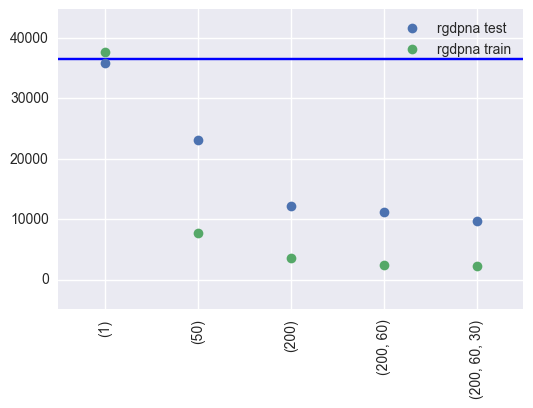

In [21]:
x = [1, 2, 3, 4, 5]
lr_test = 36589
lr_train = 38513
MLP_test = [35904, 23110, 12239, 11226, 9654]
MLP_train = [37660, 7705, 3558, 2349, 2181]
labels = ['(1)', '(50)', '(200)', '(200, 60)', '(200, 60, 30)']

fig, ax = plt.subplots()
plt.xlim(min(x)-0.5, max(x)+0.5)


plt.axhline(lr_test)
# plt.plot(x, lr_test, label='linear regression')
plt.plot(x, MLP_test, 'o', label='rgdpna test')
plt.plot(x, MLP_train, 'o', label='rgdpna train')


legend = ax.legend(loc='upper right', shadow=True)

# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

# Learning curve

In [70]:
def subsample(M, X_keys, y_keys, ratio):
    Ms = shuffle(M, n_samples = int(X.shape[0]*ratio)).reset_index(drop = True)
    return (Ms[X_keys], Ms[y_keys])


otherParams = {
    'max_iter': 3000,
    'alpha': 0.005,
    'tol': 5e-07,
    'solver': 'lbfgs',
}

lrs = [(linear_model.LinearRegression(), f_transf)]
MLP1 = [(MLPRegressor(hidden_layer_sizes=(50), **otherParams), f_transf)]
MLP2 = [(MLPRegressor(hidden_layer_sizes=(200), **otherParams), f_transf)]

# Cross-validation (average over 5 different 5-fold splits to smooth the result)

learn_scores = []

for ratio in range(10, 101, 10):
    print(str(ratio))
    X_s, y_s = subsample(df_final, X_keys_all, y_keys, ratio/100.0)
    learn_scores.append(np.concatenate(np.asarray([CV(lrs + MLP1 + MLP2, X_s, y_s, scorer, 5) for i in range(0, 2)])))

print(time.time() - t)


test_rmse, train_rmse = scores.mean(axis=0).T
print(test_rmse, train_rmse)

10
starting new step
step took: 74.96429991722107s
starting new step
step took: 78.32535314559937s
20
starting new step
step took: 146.04416012763977s
starting new step
step took: 132.8092908859253s
30
starting new step
step took: 224.34253001213074s
starting new step
step took: 195.41718292236328s
40
starting new step
step took: 284.1339259147644s
starting new step
step took: 273.39706897735596s
50
starting new step
step took: 330.05570006370544s
starting new step
step took: 332.92775106430054s
60
starting new step
step took: 398.6535050868988s
starting new step
step took: 1571.0762858390808s
70
starting new step
step took: 458.25633478164673s
starting new step
step took: 445.91752099990845s
80
starting new step
step took: 602.1953918933868s
starting new step
step took: 564.785728931427s
90
starting new step
step took: 611.2612478733063s
starting new step
step took: 611.8273639678955s
100
starting new step
step took: 648.2817060947418s
starting new step
step took: 649.9271380901337s
1

In [19]:
test_rmse, train_rmse = scores.mean(axis=0).T
print(test_rmse, train_rmse)

[ 40071.69928246  30250.33014004  23535.9654635 ] [ 38381.48640954   6871.79507715   2878.24390292]


0.1